## **Overview**
### **Customer Segmentation in Retail using Clustering**
#### **1. Introduction**
Customer segmentation is a critical process in retail and marketing that involves grouping customers based on their shopping behavior and demographic attributes. By leveraging machine learning techniques, businesses can identify distinct customer groups and tailor their marketing strategies accordingly.

This project aims to analyze mall customers' spending patterns and segment them into different groups using clustering techniques, particularly **K-Means Clustering**.

#### **2. Objectives**
- To analyze customer demographic and spending behavior.
- To apply clustering techniques to segment customers into different groups.
- To visualize customer segments and derive meaningful business insights.
- To provide recommendations on how businesses can personalize their marketing strategies for different customer groups.

#### **3. Dataset Description**
The dataset used in this project is **Mall Customer Segmentation Data** from Kaggle, which consists of:
- **Customer ID**: Unique identifier for each customer.
- **Gender**: Male or Female.
- **Age**: Age of the customer.
- **Annual Income (k$)**: Customer’s annual income in thousands of dollars.
- **Spending Score (1-100)**: A score assigned to customers based on their spending behavior and purchasing frequency.

#### **4. Methodology**
- **Data Preprocessing**: Handle missing values (if any), normalize numerical features, and encode categorical variables.
- **Exploratory Data Analysis (EDA)**: Visualizing customer distribution, relationships between features, and outlier detection.
- **Clustering Model Implementation**:
  - **K-Means Clustering**: Finding the optimal number of clusters using the **Elbow Method** and **Silhouette Score**.
  - **Hierarchical Clustering (Optional)**: To compare results with K-Means.
- **Cluster Visualization**: Use scatter plots and PCA to visualize customer groupings.
- **Business Insights & Recommendations**: Analyze each segment’s characteristics and suggest targeted marketing strategies.

#### **5. Expected Outcome**
- Identification of distinct customer segments (e.g., High spenders, Budget-conscious customers, Young shoppers, etc.).
- Clear visual representation of customer distribution and segmentation.
- Business recommendations for personalized marketing strategies.

### **Step 1: Load & Explore the Dataset**

#### **1.1 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

#### **1.2 Load the Data**
Load the CSV file into a Pandas DataFrame.

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### **1.3 Understand the Data**
Check for missing values and basic information.

In [3]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### **1.4 Data Summary**
Get a statistical summary of numerical features.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **Step 2: Exploratory Data Analysis (EDA)**

#### **2.1 Visualizing Distributions**
Check the distribution of key features.

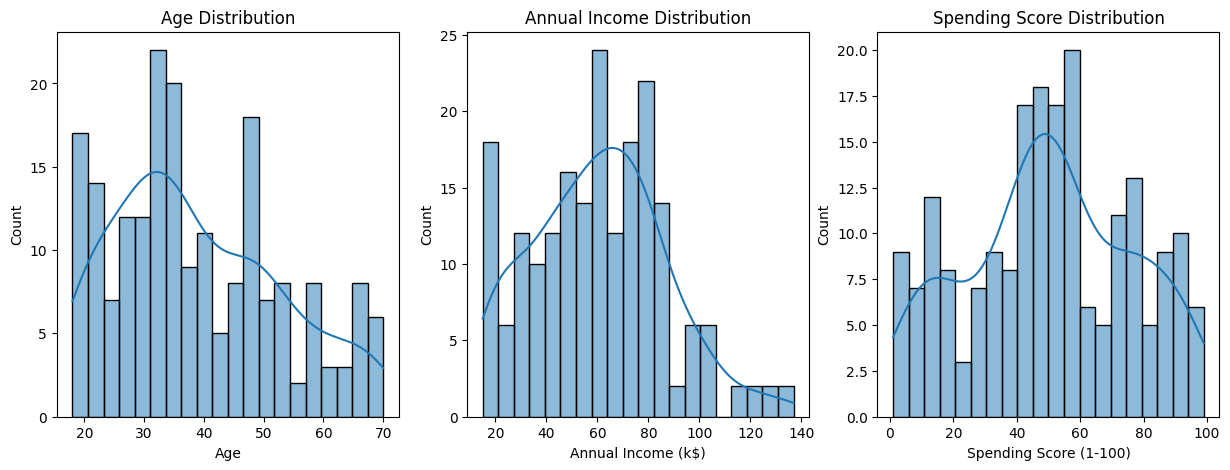

In [5]:
# Distribution of Age, Annual Income, and Spending Score
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['Age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Spending Score Distribution')

plt.show()

#### **2.2 Analyze Gender Distribution**
- Before encoding, check how gender affects spending behavior and income.
- This helps decide if it should be included in clustering or analyzed separately.

/var/folders/gy/ghmwc6_x4vgg3f801kw6vx980000gn/T/ipykernel_67028/1248907889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette="pastel")


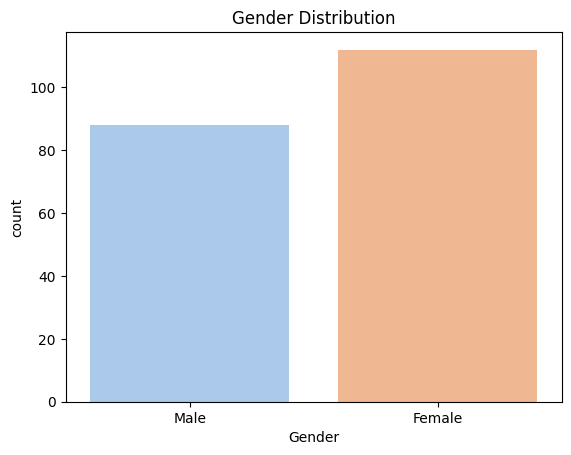

In [7]:
# Count of Male vs Female Customers
sns.countplot(x=df['Gender'], palette="pastel")
plt.title("Gender Distribution")
plt.show()

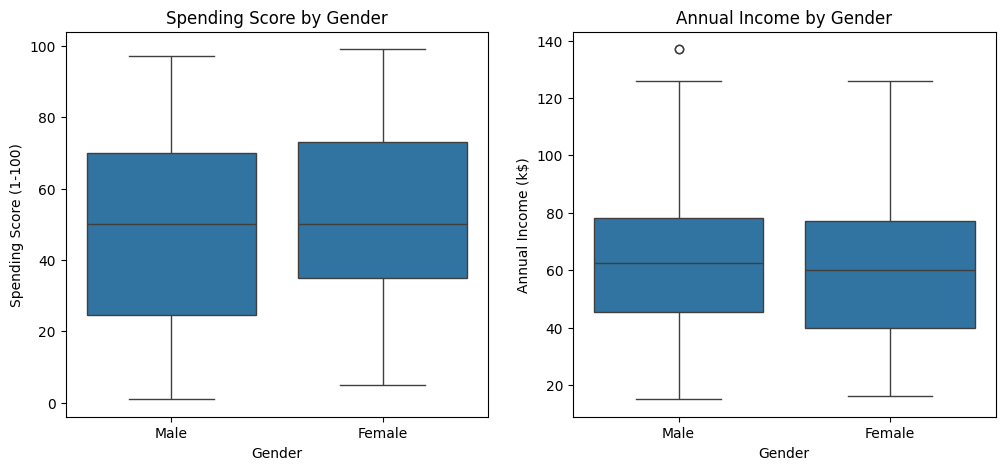

In [8]:
# Boxplot to see how Gender impacts Spending Score & Income
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'], data=df, ax=ax[0])
ax[0].set_title("Spending Score by Gender")

sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'], data=df, ax=ax[1])
ax[1].set_title("Annual Income by Gender")

plt.show()

From the graphs:

1. **Spending Score by Gender**: 
   - There is no significant difference in spending scores between males and females. The medians and interquartile ranges (IQRs) are very similar.

2. **Annual Income by Gender**: 
   - Similar to the spending score, there is no substantial difference in annual income between genders. The distributions overlap significantly, with comparable medians and ranges.

3. **Gender Distribution**: 
   - While there are slightly more females than males, the difference in count is minor and likely does not impact segmentation heavily.

Since `Gender` does not show significant variation in its relationship with `Spending Score` or `Annual Income`, **it is not critical to include it in clustering.** However, we can analyze it separately for insights but avoid adding it to clustering features, as it may add noise instead of value.

#### **2.3 Correlation Analysis**
Analyze correlations between numerical variables.

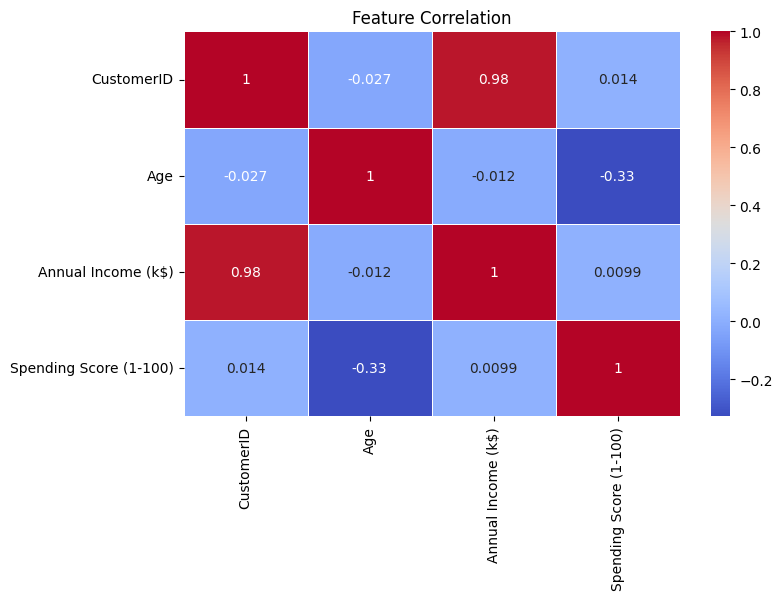

In [9]:
# Remove categorical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

The correlation heatmap shows some important insights:

- Age has a weak negative correlation with Spending Score (-0.33), suggesting that younger customers may spend more, but the relationship is not very strong.
- Annual Income has no significant correlation with Spending Score (0.0099), indicating that spending habits are not directly tied to income level.
- Customer ID is irrelevant for clustering, so we should exclude it.


### **Step 3: Data Processing**

#### **3.1 Remove Irrelevant Columns**
Drop CustomerID from the dataset.

In [10]:
df.drop(columns=['CustomerID'], inplace=True)

#### **3.2 Feature Selection**

In [11]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### **3.3 Normalize Features**
Scale the data to standardize the range of numerical features, ensuring fair distance calculation during clustering.

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### **Step 4: Finding Optimal Clusters**

#### **4.1 Elbow Method**
Find the optimal number of clusters by plotting Within-Cluster Sum of Squares (WCSS).

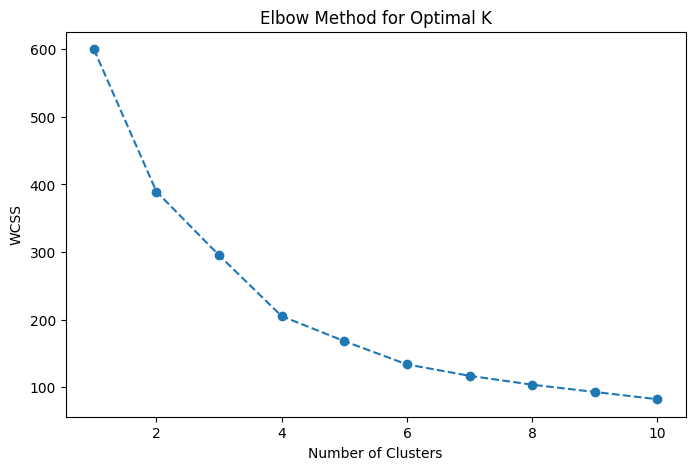

In [13]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

#### **4.2 Silhouette Score**
Evaluate clustering quality.

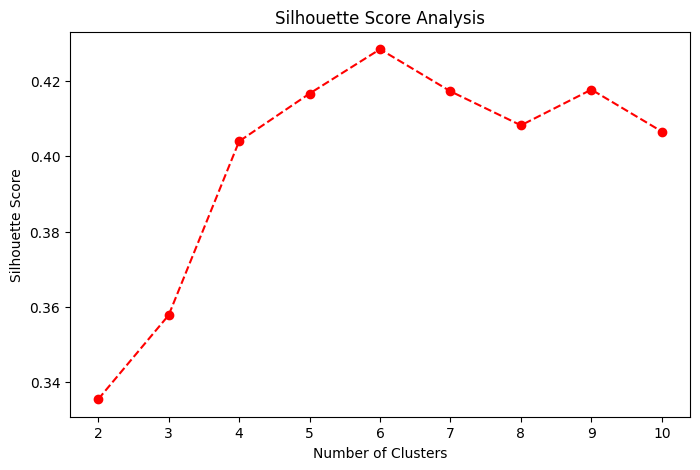

In [14]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="--", color='r')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

From the graphs:

1. **Elbow Method (WCSS)**:
   - The **"elbow" point** appears at **K = 5**, where the rate of decrease in WCSS slows down significantly.
   - This indicates diminishing returns in improving clustering by adding more clusters after 5.

2. **Silhouette Score**:
   - The **highest silhouette score** is observed at **K = 6**, which suggests that the clustering quality is optimal when there are 6 clusters.

- Since **K = 5** is the elbow point and the silhouette score at **K = 5** is close to the maximum (not much lower than at **K = 6**), It is recommend starting with **K = 5** for simplicity and interpretability. 
- We can also analyze **K = 6** later for comparison if needed.

### **Step 5: Applying K-Means Clustering**

In [15]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

### **Step 6: Visualizing Clusters**

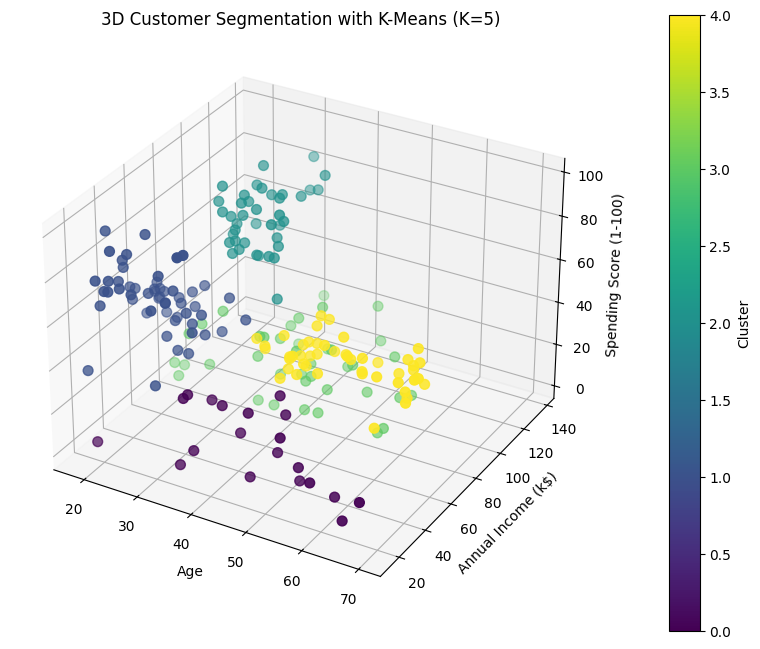

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(
    df['Age'], 
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    c=df['Cluster'], 
    cmap="viridis", 
    s=50
)

# Setting axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Customer Segmentation with K-Means (K=5)")

# Add colorbar to show clusters
plt.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')
plt.show()

In [17]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

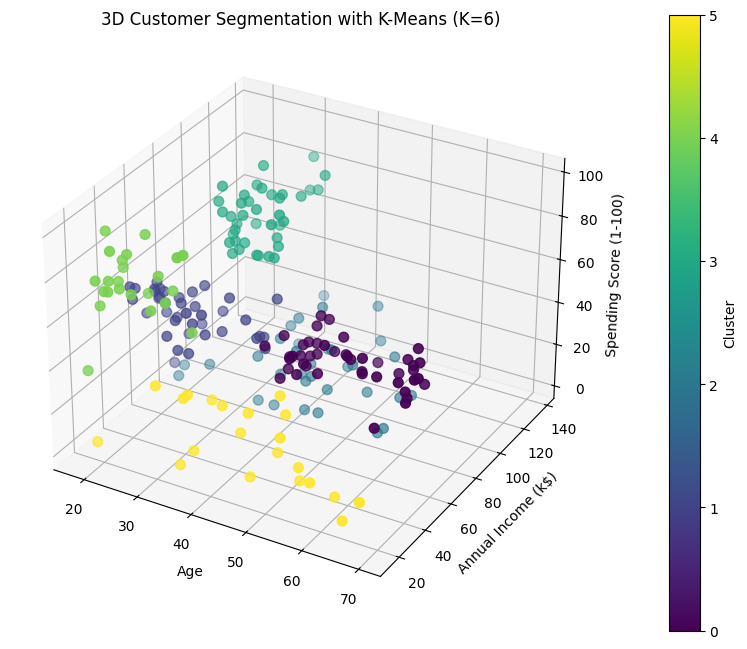

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(
    df['Age'], 
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    c=df['Cluster'], 
    cmap="viridis", 
    s=50
)

# Setting axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Customer Segmentation with K-Means (K=6)")

# Add colorbar to show clusters
plt.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')
plt.show()

Both **K=5** and **K=6** show distinct clusters, and the choice depends on the balance between interpretability and the level of granularity required for the business insights.

### **Comparison Between K=5 and K=6**
1. **K=5:**
   - Simpler to interpret with fewer clusters.
   - Provides broad segmentation (e.g., budget-conscious, high spenders, etc.).
   - Ideal if the goal is to create general strategies or target fewer customer groups.

2. **K=6:**
   - Offers more granular segmentation, which might uncover subtle differences between customer groups.
   - Slightly more complex to interpret, but allows for highly tailored strategies for each group.
   - Useful if the business requires detailed and specific strategies for each segment.

### **I Am Proceeding with K=6**
Since **K=6** provides more detailed segmentation, it's worth proceeding with it unless simplicity is a higher priority. The additional cluster may reveal finer nuances in customer behavior, which can lead to better-targeted marketing strategies.

### **Step 7: Analyze Cluster Characteristics**

We need to examine the characteristics of each cluster based on the features (Age, Annual Income, and Spending Score).

In [23]:
numeric_columns = df.select_dtypes(include=['number'])
cluster_summary = numeric_columns.groupby('Cluster').mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        26.794872           57.102564               48.128205
2        41.939394           88.939394               16.969697
3        32.692308           86.538462               82.128205
4        25.000000           25.260870               77.608696
5        45.523810           26.285714               19.380952


This summary provides a good overview of the cluster characteristics. Let’s analyze the clusters and assign labels based on their characteristics.

---

### **Label the Clusters**
Here’s a breakdown of each cluster based on the summary statistics:

#### **Cluster 0**
- **Age:** ~56 years (older customers)
- **Annual Income:** ~$54k (moderate income)
- **Spending Score:** ~49 (average spenders)
- **Label:** **Middle-aged Moderate Spenders**  
  These are older customers with moderate income and average spending habits.

#### **Cluster 1**
- **Age:** ~27 years (younger customers)
- **Annual Income:** ~$57k (moderate income)
- **Spending Score:** ~48 (average spenders)
- **Label:** **Young Moderate Spenders**  
  Younger customers with moderate income and spending behavior.

#### **Cluster 2**
- **Age:** ~42 years (middle-aged customers)
- **Annual Income:** ~$89k (high income)
- **Spending Score:** ~17 (low spenders)
- **Label:** **High-Income Low Spenders**  
  Middle-aged customers with high income but low spending.

#### **Cluster 3**
- **Age:** ~33 years (younger customers)
- **Annual Income:** ~$87k (high income)
- **Spending Score:** ~82 (high spenders)
- **Label:** **High-Income High Spenders**  
  Younger, high-income customers who spend a lot.

#### **Cluster 4**
- **Age:** ~25 years (younger customers)
- **Annual Income:** ~$25k (low income)
- **Spending Score:** ~78 (high spenders)
- **Label:** **Low-Income High Spenders**  
  Younger customers with low income but high spending behavior.

#### **Cluster 5**
- **Age:** ~46 years (older customers)
- **Annual Income:** ~$26k (low income)
- **Spending Score:** ~19 (low spenders)
- **Label:** **Low-Income Low Spenders**  
  Older, low-income customers who spend very little.

### **Cluster Sizes** 

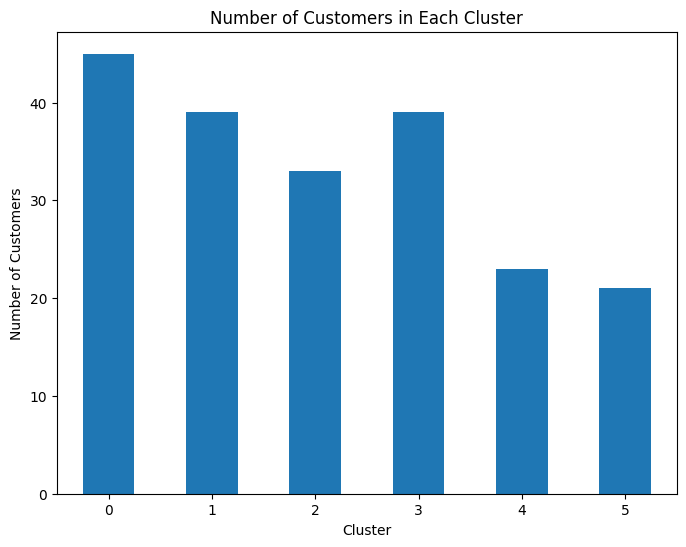

In [25]:
cluster_counts = df['Cluster'].value_counts().sort_index()

cluster_counts.plot(
    kind='bar',
    figsize=(8, 6)
)
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

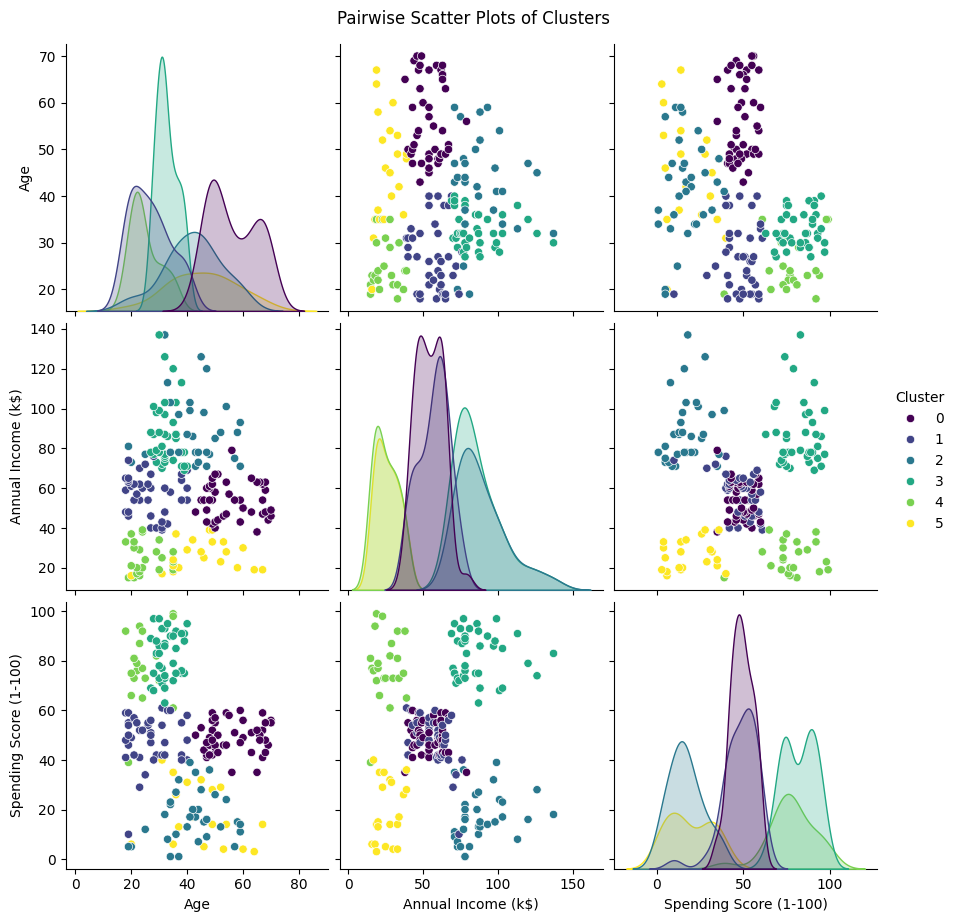

In [26]:
sns.pairplot(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']],
    hue='Cluster',
    palette='viridis',
    diag_kind='kde',
    height=3
)
plt.suptitle("Pairwise Scatter Plots of Clusters", y=1.02)
plt.show()

### **Business Recommendations**
Based on the clusters, here are some actionable insights:
1. **High-Income High Spenders (Cluster 3):**
   - Offer exclusive loyalty programs and premium products to retain them.

2. **Low-Income High Spenders (Cluster 4):**
   - Promote budget-friendly premium options or discounts to encourage more spending.

3. **High-Income Low Spenders (Cluster 2):**
   - Upsell or cross-sell products that cater to their preferences.

4. **Middle-aged Moderate Spenders (Cluster 0):**
   - Provide personalized offers to encourage more frequent purchases.

5. **Young Moderate Spenders (Cluster 1):**
   - Engage with dynamic marketing strategies targeting younger demographics.

6. **Low-Income Low Spenders (Cluster 5):**
   - Offer discounts or incentives to encourage spending.

### **Conclusion**

The clustering analysis successfully segmented customers into six distinct groups based on their age, income, and spending behavior. These clusters provide actionable insights for businesses to design targeted marketing strategies, optimize resource allocation, and improve customer satisfaction.

This segmentation framework can be further enhanced by including additional features such as purchase history, geographic location, or product preferences.

### **Future Scope**

- Experiment with hierarchical clustering or DBSCAN to compare results.

- Include additional features like product categories or geographic data.

- Test clustering results using real-world marketing data to measure business impact.